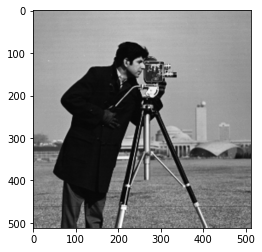

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import roberts, sobel, scharr
from PIL import Image
image = data.camera()
# image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)

plt.imshow(image,cmap='gray')
plt.show()

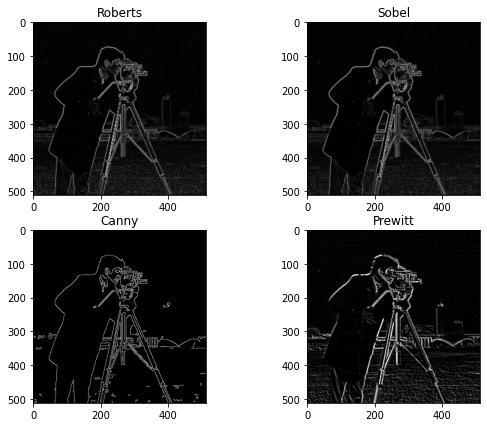

In [42]:
img_gaussian = cv2.GaussianBlur(image,(3,3),0)

edge_roberts = roberts(image)
edge_sobel = sobel(image)
edge_scharr = scharr(image)

edge_canny = cv2.Canny(img_gaussian,100,200)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
edge_prewitt = img_prewittx + img_prewitty

i=0
plt.figure(figsize=(9,7))
plt.subplot(2,2,i+1) 
plt.imshow(edge_roberts, cmap='gray')
plt.title('Roberts')
plt.subplot(2,2,i+2)
plt.imshow(edge_sobel, cmap='gray')
plt.title('Sobel')
plt.subplot(2,2,i+3)
plt.imshow(edge_canny, cmap='gray')
plt.title('Canny')
plt.subplot(2,2,i+4)
plt.imshow(edge_prewitt, cmap='gray')
plt.title('Prewitt')

plt.show()

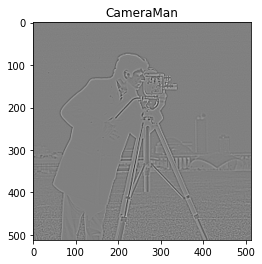

In [38]:
import cv2
import matplotlib.pyplot as plt

img = data.camera()
blur_img = cv2.GaussianBlur(img, (3, 3), 0)
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)

plt.figure()
plt.title('CameraMan')
plt.imshow(laplacian, cmap='gray')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  # Remove the CWD from sys.path while we load stuff.


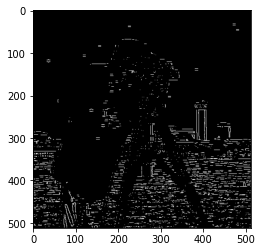

In [39]:
import scipy as sp
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage import data    

img = data.camera()
LoG = nd.gaussian_laplace(img , 2)
thres = np.absolute(LoG).mean() * 0.75
output = sp.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]

for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+2, x-1:x+2]
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        if (p > 0):
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if ((maxP - minP) > thres) and zeroCross:
            output[y, x] = 1

plt.imshow(output, cmap='gray')
plt.show()

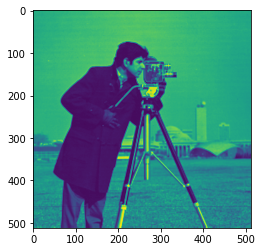

In [36]:
plt.imshow(img)
plt.show()